In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob, Word, Blobber
import flair
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer

In [48]:
sns.set_style('darkgrid')

In [2]:
#import data
headline_df = pd.read_csv('data/espn_df_recluster.csv')
tweet_df = pd.read_csv('data/nba_twitter.csv')

In [3]:
#preview ESPN headlines
headline_df.head()

,headlines,posted_time,tokens,labels,four_labels,five_labels
0,Wade matches King for 42nd on scoring list in win,2016-02-01,"['wade', 'match', 'king', '42nd', 'scoring', '...",0,3,3
1,"Chick Hearn's widow, Marge Hearn, dies at 98",2016-01-31,"['chick', 'hearns', 'widow', 'marge', 'hearn',...",0,3,3
2,Wittman to miss 2 games after brother's death,2016-01-31,"['wittman', 'miss', '2', 'game', 'brother', 'd...",0,3,3
3,LeBron atones for wardrobe mismatch vs. Spurs,2016-01-31,"['lebron', 'atones', 'wardrobe', 'mismatch', '...",0,3,4
4,Source: Rockets petition to rescind Howard's t...,2016-01-31,"['source', 'rocket', 'petition', 'rescind', 'h...",0,3,3


In [4]:
#preview Twitter data
tweet_df.head()

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels
0,2021-02-26 12:35:27,Obi Toppin is expected to participate in the N...,Yahoo,"['obi', 'toppin', 'expected', 'participate', '...",0,0,3,1
1,2021-02-25 23:08:17,MPJ SLAM,Yahoo,"['mpj', 'slam', '']",1,2,1,2
2,2021-02-25 17:48:50,Timberwolves G Malik Beasley has been suspende...,Yahoo,"['timberwolves', 'g', 'malik', 'beasley', 'sus...",1,2,1,2
3,2021-02-25 13:40:20,Luka's game-winner against the Celtics vs. Luk...,Yahoo,"['lukas', 'gamewinner', 'celtic', 'v', 'lukas'...",1,2,2,2
4,2021-02-25 13:10:50,It's time to stop underrating the Utah Jazz Fr...,Yahoo,"['time', 'stop', 'underrating', 'utah', 'jazz'...",1,2,1,2


In [5]:
def count_player_mentions(text):
    text_string = text
    
    lebron_count = 0
    curry_count = 0
    harden_count = 0
    kd_count = 0
    kyrie_count = 0
    dame_count = 0
    luka_count = 0
    zion_count = 0
    ja_count = 0
    giannis_count = 0
    jokic_count = 0
    embiid_count = 0
    cp3_count = 0
    
    if text_string.count('LeBron') > 0 or text_string.count('LBJ') > 0 or text_string.count('King James') > 0:
        lebron_count += 1
    
    if text_string.count('Curry') > 0 or text_string.count('Stephen') > 0 or text_string.count('Steph') > 0:
        curry_count += 1
    
    if text_string.count('James Harden') > 0 or text_string.count('Harden') > 0:
        harden_count += 1
        
    if text_string.count('Kevin Durant') > 0 or text_string.count('Durant') > 0 or text_string.count('KD') > 0:
        kd_count += 1
        
    if (text_string.count('Kyrie Irving') > 0 or text_string.count('Irving') > 0 
        or text_string.count('Kyrie') > 0):
        kyrie_count += 1
        
    if (text_string.count('Damian Lillard') > 0 or text_string.count('Lillard') > 0 
        or text_string.count('Dame') > 0):
        dame_count += 1
    
    if text_string.count('Luka Doncic') > 0 or text_string.count('Luka') > 0 or text_string.count('Doncic') > 0:
        luka_count += 1
        
    if (text_string.count('Zion Williamson') > 0 or text_string.count('Williamson') > 0 
        or text_string.count('Zion') >0):
        zion_count += 1
        
    if text_string.count('Ja Morant') > 0 or text_string.count('Morant') > 0 or text_string.count('Ja '):
        ja_count += 1
        
    if (text_string.count('Giannis') > 0 or text_string.count('Antetokounmpo') > 0 
        or text_string.count('Greek Freak') > 0):
        giannis_count += 1
    
    if (text_string.count('Nikola') > 0 or text_string.count('Jokic') > 0 
        or text_string.count('Joker') > 0):
        jokic_count += 1
    
    if (text_string.count('Joel')> 0 or text_string.count('Embiid') > 0):
        embiid_count += 1
        
    if (text_string.count('Chris Paul') > 0 or text_string.count('CP3') > 0):
        cp3_count += 1
        
    return [lebron_count, curry_count, harden_count, kd_count, 
            kyrie_count, dame_count, luka_count, zion_count, ja_count, 
            giannis_count, jokic_count, embiid_count, cp3_count]

In [6]:
def count_team_mentions(text):
    text_str = text
    
    atl_count = 0
    boston_count = 0
    brooklyn_count = 0
    charlotte_count = 0
    chicago_count = 0
    cleveland_count = 0
    dallas_count = 0
    denver_count = 0
    detroit_count = 0
    gsw_count = 0
    houston_count = 0
    indiana_count = 0
    clippers_count = 0
    lakers_count = 0
    memphis_count = 0
    miami_count = 0
    bucks_count = 0
    minn_count = 0
    pelicans_count = 0
    knicks_count = 0
    okc_count = 0
    orlando_count = 0
    philly_count = 0
    phoenix_count = 0
    portland_count = 0
    sac_count = 0
    spurs_count = 0
    raptors_count = 0
    utah_count = 0
    wizards_count = 0
    
    if text_str.count('Atlanta') > 0 or text_str.count('ATL') > 0 or text_str.count('Hawks') > 0:
        atl_count += 1
        
    if text_str.count('Boston') > 0 or text_str.count('Celtics') > 0:
        boston_count += 1
        
    if text_str.count('Brooklyn') > 0 or text_str.count('Nets') > 0:
        brooklyn_count += 1
        
    if text_str.count('Charlotte') > 0 or text_str.count('Hornets') > 0:
        charlotte_count += 1
        
    if text_str.count('Chicago') > 0 or text_str.count('Bulls') > 0 or text_str.count('Windy City') > 0:
        chicago_count += 1
        
    if text_str.count('Cleveland') > 0 or text_str.count('Cavaliers') > 0 or text_str.count('Cavs') > 0:
        cleveland_count += 1
        
    if text_str.count('Dallas') > 0 or text_str.count('Mavericks') > 0 or text_str.count('Mavs') > 0:
        dallas_count += 1
        
    if text_str.count('Denver') > 0 or text_str.count('Nuggets') > 0:
        denver_count += 1
        
    if text_str.count('Detroit') > 0 or text_str.count('Pistons') > 0 or text_str.count('Motor City') > 0:
        detroit_count += 1
        
    if text_str.count('Golden State') > 0 or text_str.count('Warriors') > 0 or text_str.count('GSW') > 0:
        gsw_count += 1
        
    if text_str.count('Houston') > 0 or text_str.count('Rockets') > 0 or text_str.count('H-Town') > 0:
        houston_count += 1
        
    if text_str.count('Indiana') > 0 or text_str.count('Pacers') > 0:
        indiana_count += 1
        
    if text_str.count('Clippers') > 0 or text_str.count('LAC') > 0 or text_str.count('Clips') > 0:
        clippers_count += 1
        
    if text_str.count('Lakers') > 0 or text_str.count('LAL') > 0:
        lakers_count += 1
        
    if text_str.count('Memphis') > 0 or text_str.count('Grizzlies') > 0:
        memphis_count += 1
        
    if text_str.count('Miami') > 0 or text_str.count('Heat') > 0:
        miami_count += 1
        
    if text_str.count('Milwaukee') > 0 or text_str.count('Bucks') > 0:
        bucks_count += 1
        
    if (text_str.count('Minnesota') > 0 or text_str.count('Timberwolves') > 0 or text_str.count("T'Wolves") > 0
       or text_str.count('Wolves') > 0):
        minn_count += 1
        
    if text_str.count('New Orleans') > 0 or text_str.count('Pelicans') > 0 or text_str.count('NOP') > 0:
        pelicans_count += 1
        
    if text_str.count('NYK') > 0 or text_str.count('Knicks') > 0 or text_str.count('New York') > 0:
        knicks_count += 1
        
    if (text_str.count('OKC') > 0 or text_str.count('Thunder') > 0 or 
        text_str.count('Oklahoma City Thunder')) > 0:
        okc_count += 1
        
    if text_str.count('Orlando') > 0 or text_str.count('Magic') > 0:
        orlando_count += 1
        
    if (text_str.count('Philadelphia') > 0 or text_str.count('76ers') > 0 or text_str.count('Sixers') > 0 
        or text_str.count('Philly') > 0):
        philly_count += 1
        
    if text_str.count('Phoenix') > 0 or text_str.count('Suns') > 0:
        phoenix_count += 1
        
    if text_str.count('Portland') > 0 or text_str.count('Trailblazers') > 0 or text_str.count('Blazers'):
        portland_count += 1
        
    if text_str.count('Sacramento') > 0 or text_str.count('Kings') > 0:
        sac_count += 1
        
    if text_str.count('San Antonio') > 0 or text_str.count('Spurs') > 0:
        spurs_count += 1
        
    if text_str.count('Toronto') > 0 or text_str.count('Raptors') > 0 or text_str.count('Jurassic Park') > 0:
        raptors_count += 1
        
    if text_str.count('Utah') > 0 or text_str.count('Jazz') > 0 or text_str.count('Salt Lake City') > 0:
        utah_count += 1
        
    if text_str.count('Washington') > 0 or text_str.count('Wizards') > 0 or text_str.count('DC') > 0:
        wizards_count += 1
        
    return [atl_count, boston_count, brooklyn_count, charlotte_count , chicago_count, cleveland_count,
            dallas_count, denver_count, detroit_count, gsw_count, houston_count, indiana_count,
            clippers_count, lakers_count, memphis_count, miami_count, bucks_count, minn_count, pelicans_count,
            knicks_count, okc_count, orlando_count, philly_count, phoenix_count, portland_count, sac_count,
            spurs_count, raptors_count, utah_count, wizards_count]

In [7]:
#drop duplicate rows
headline_df.drop_duplicates(inplace=True)
tweet_df.drop_duplicates(inplace=True)

#drop null rows for tweet/headline column
headline_df.dropna(subset=['headlines'], inplace=True)
tweet_df.dropna(subset=['tweet'], inplace=True)

In [8]:
#count player mentions from headlines and store informatiion into a dataframe
headline_list = list(headline_df['headlines'])

headline_player_mention_count = [count_player_mentions(x) for x in headline_list]

headline_player_mentions_df = pd.DataFrame(headline_player_mention_count, 
                                  columns=['LeBron', 'Steph', 'Harden', 'KD', 
                                           'Kyrie','Dame','Luka','Zion','Ja',
                                           'Giannis', 'Jokic', 'Embiid','CP'])

#count team mentions from headlines and store information into a dataframe
headline_team_mention_count = [count_team_mentions(x) for x in headline_list]

headline_team_mentions_df = pd.DataFrame(headline_team_mention_count, 
                                          columns=['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL','DEN', 
                                                 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 
                                                 'MIL', 'MIN', 'NOP', 'NYK', 'OKC','ORL', 'PHI', 'PHX', 
                                                 'POR', 'SAC', 'SAT', 'TOR', 'UTAH', 'WAS'])

In [9]:
#count player mentions from tweets and store information into a dataframe
tweet_list = list(tweet_df['tweet'])

tweets_player_mention_count = [count_player_mentions(y) for y in tweet_list]

tweets_player_mentions_df = pd.DataFrame(tweets_player_mention_count,
                                        columns=['LeBron', 'Steph', 'Harden', 'KD', 
                                           'Kyrie','Dame','Luka','Zion','Ja',
                                           'Giannis', 'Jokic', 'Embiid','CP'])

#count team mentions from tweets and store information into a dataframe
tweets_team_mention_count = [count_team_mentions(y) for y in tweet_list]

tweets_team_mentions_df = pd.DataFrame(tweets_team_mention_count, 
                                      columns=['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL','DEN', 
                                                 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 
                                                 'MIL', 'MIN', 'NOP', 'NYK', 'OKC','ORL', 'PHI', 'PHX', 
                                                 'POR', 'SAC', 'SAT', 'TOR', 'UTAH', 'WAS'])

In [10]:
headline_player_mentions_df.head()

,LeBron,Steph,Harden,KD,Kyrie,Dame,Luka,Zion,Ja,Giannis,Jokic,Embiid,CP
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
headline_player_mentions_df.sum().sort_values(ascending=False)

LeBron     1535
Steph       842
KD          750
Harden      643
Giannis     540
Kyrie       518
Embiid      434
Dame        341
Luka        282
Zion        236
Jokic       195
CP          162
Ja           73
dtype: int64

In [12]:
headline_player_names = list(headline_player_mentions_df.sum().index)

Text(0.5, 1.0, 'Player Mentions in ESPN Headlines')

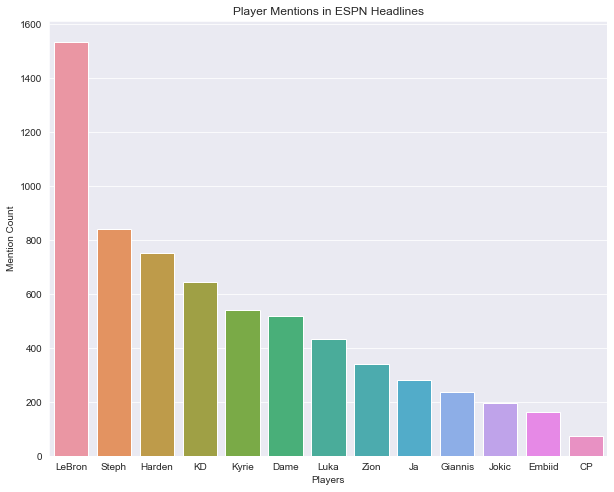

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(x=headline_player_names, y=headline_player_mentions_df.sum().sort_values(ascending=False).values)
plt.xlabel('Players')
plt.ylabel('Mention Count')
plt.title('Player Mentions in ESPN Headlines')

In [14]:
headline_team_mentions_df.head()

,ATL,BOS,BKN,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAT,TOR,UTAH,WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
headline_team_mentions_df.sum().sort_values(ascending=False)

GSW     2064
CLE     1917
LAL     1814
BOS     1601
HOU     1496
PHI     1417
LAC     1323
TOR     1318
OKC     1304
MIL     1301
NYK     1250
MIA     1246
SAT     1240
CHI     1239
UTAH    1175
BKN     1142
POR     1130
NOP     1121
ATL     1096
DAL     1091
DEN     1088
SAC     1070
ORL     1065
IND     1049
MIN     1043
PHX     1034
DET     1034
WAS     1021
MEM      984
CHA      921
dtype: int64

In [16]:
#create list of team names based on espn headlines
headline_team_names = list(headline_team_mentions_df.sum().sort_values(ascending=False).index)

Text(0.5, 1.0, 'Most Mentioned Teams in ESPN Headlines')

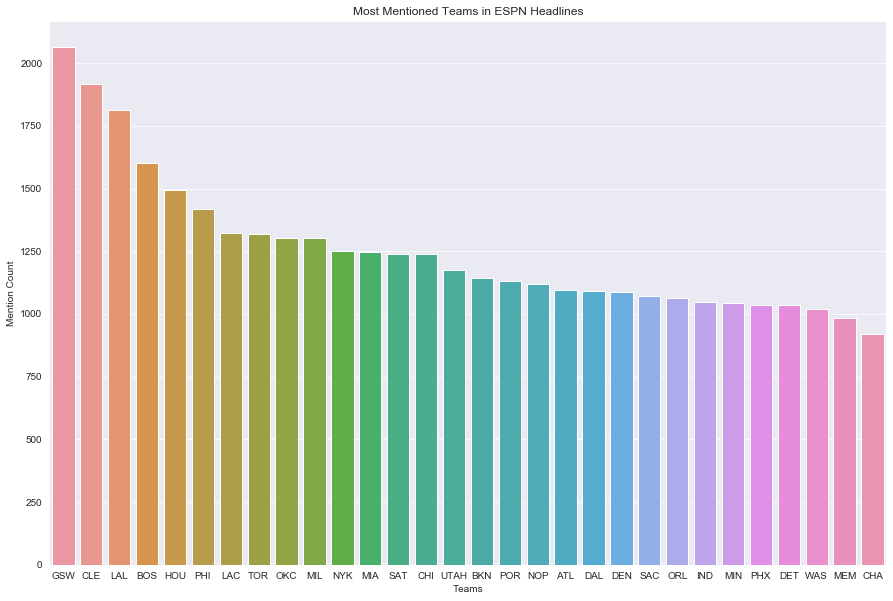

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x=headline_team_names, y=headline_team_mentions_df.sum().sort_values(ascending=False).values)
plt.xlabel('Teams')
plt.ylabel('Mention Count')
plt.title('Most Mentioned Teams in ESPN Headlines')

In [18]:
tweets_player_mentions_df.head()

,LeBron,Steph,Harden,KD,Kyrie,Dame,Luka,Zion,Ja,Giannis,Jokic,Embiid,CP
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
tweets_player_mentions_df.sum().sort_values(ascending=False)

LeBron     6654
KD         3447
Steph      3363
Kyrie      1905
Harden     1695
Giannis    1531
Embiid     1116
CP          991
Zion        926
Dame        864
Luka        753
Jokic       561
Ja          252
dtype: int64

In [20]:
twitter_player_names = list(tweets_player_mentions_df.sum().sort_values(ascending=False).index)

Text(0.5, 1.0, 'Player Mentions in Tweets from Various NBA Media Outlets')

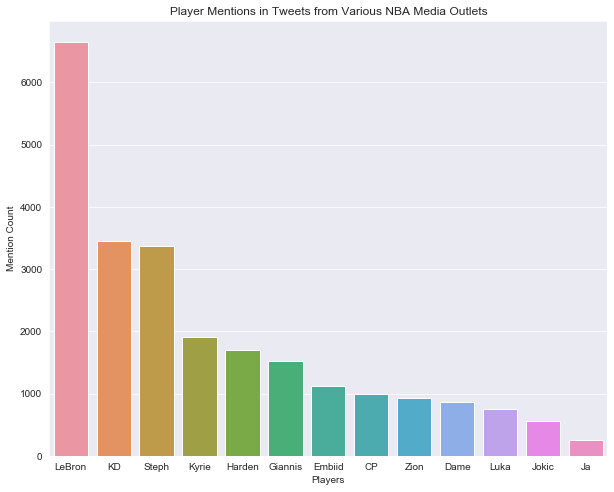

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x=twitter_player_names, y=tweets_player_mentions_df.sum().sort_values(ascending=False).values)
plt.xlabel('Players')
plt.ylabel('Mention Count')
plt.title('Player Mentions in Tweets from Various NBA Media Outlets')

In [22]:
tweets_team_mentions_df.head()

,ATL,BOS,BKN,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAT,TOR,UTAH,WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
tweets_team_mentions_df.sum()

ATL     1106
BOS     2787
BKN     1402
CHA      712
CHI     1421
CLE     3871
DAL     1117
DEN      915
DET      745
GSW     5922
HOU     2471
IND      920
LAC     1786
LAL     3954
MEM      804
MIA     1677
MIL     1441
MIN     1222
NOP     1200
NYK     2186
OKC     1990
ORL     1172
PHI     2313
PHX     1043
POR     1128
SAC     1075
SAT     1678
TOR     2237
UTAH    1023
WAS     1296
dtype: int64

In [24]:
#create list of sorted team names based on tweets
twitter_team_names = list(tweets_team_mentions_df.sum().sort_values(ascending=False).index)

Text(0.5, 1.0, 'Most Mentioned Teams in Tweets from Various NBA Media Outlets')

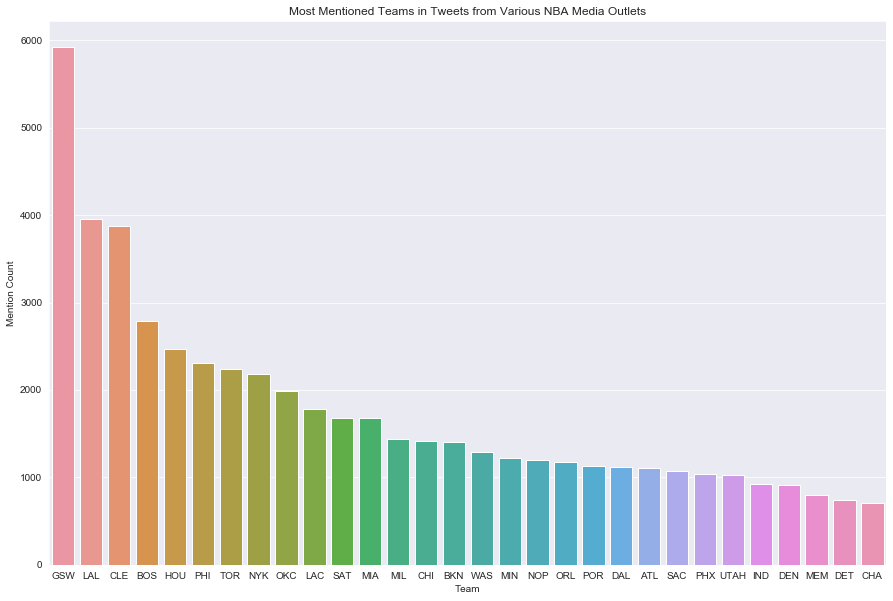

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=twitter_team_names, 
            y=tweets_team_mentions_df.sum().sort_values(ascending=False).values)
plt.xlabel('Team')
plt.ylabel('Mention Count')
plt.title('Most Mentioned Teams in Tweets from Various NBA Media Outlets')

In [26]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [27]:
headline_df.loc[3456, 'headlines']

'Rockets look for repeat against Mavericks'

In [28]:
#NLTK sentiment
sia_ = SentimentIntensityAnalyzer()
test_string_headline = headline_df.loc[3456, 'headlines']
sia_.polarity_scores(test_string_headline)



{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
#TextBlob Sentiment
TextBlob(test_string_headline).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [30]:
def calc_nltk_sentiment(string):
    """Returns compound polarity score using SentimentIntensityAnalyzer from NLTK."""
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(string)['compound']

In [31]:
def calc_textblob_sentiment(string):
    """Caclulates sentiment polarity using TextBlob library."""
    return TextBlob(string).sentiment.polarity

In [32]:
headline_nltk_vals = [calc_nltk_sentiment(x) for x in headline_list]
headline_blob_vals = [calc_textblob_sentiment(x) for x in headline_list]

In [33]:
tweets_nltk_vals = [calc_nltk_sentiment(x) for x in tweet_list]
tweets_blob_vals = [calc_textblob_sentiment(x) for x in tweet_list]

In [36]:
#create new columns with sentiment values for headlines and tweets
headline_df['nltk_sentiment'] = headline_nltk_vals
headline_df['textblob_sentiment'] = headline_blob_vals

tweet_df['nltk_sentiment'] = tweets_nltk_vals
tweet_df['textblob_sentiment'] = tweets_blob_vals

In [37]:
headline_df.head()

,headlines,posted_time,tokens,labels,four_labels,five_labels,nltk_sentiment,textblob_sentiment
0,Wade matches King for 42nd on scoring list in win,2016-02-01,"['wade', 'match', 'king', '42nd', 'scoring', '...",0,3,3,0.5859,0.8
1,"Chick Hearn's widow, Marge Hearn, dies at 98",2016-01-31,"['chick', 'hearns', 'widow', 'marge', 'hearn',...",0,3,3,0.0000,0.0
2,Wittman to miss 2 games after brother's death,2016-01-31,"['wittman', 'miss', '2', 'game', 'brother', 'd...",0,3,3,-0.6705,0.0
3,LeBron atones for wardrobe mismatch vs. Spurs,2016-01-31,"['lebron', 'atones', 'wardrobe', 'mismatch', '...",0,3,4,0.0000,0.0
4,Source: Rockets petition to rescind Howard's t...,2016-01-31,"['source', 'rocket', 'petition', 'rescind', 'h...",0,3,3,0.0000,0.0


Text(0.5, 1.0, 'TextBlob Sentiment Polarity Histogram')

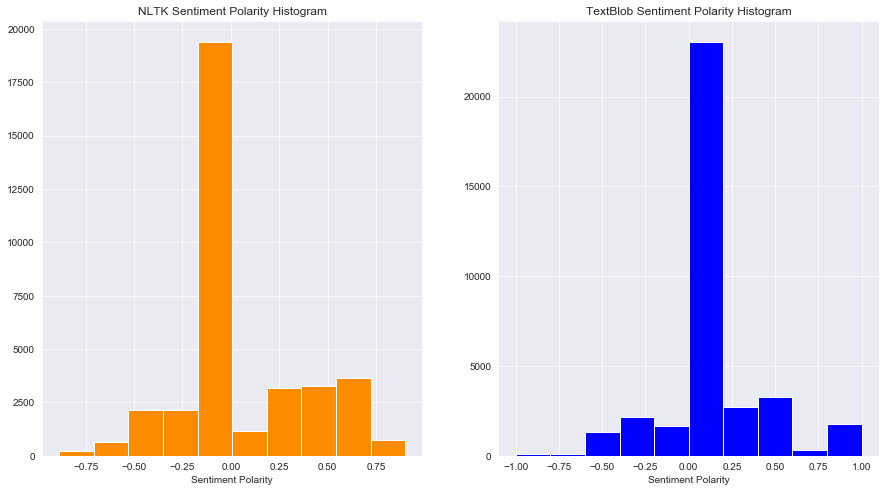

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].hist(x=headline_df['nltk_sentiment'], color='darkorange');
axs[1].hist(x=headline_df['textblob_sentiment'], color='blue');

axs[0].set_xlabel('Sentiment Polarity')
axs[0].set_title('NLTK Sentiment Polarity Histogram for Headlines')
axs[1].set_xlabel('Sentiment Polarity')
axs[1].set_title('TextBlob Sentiment Polarity Histogram for Headlines')

In [38]:
tweet_df.head()

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,quad_labels,five_labels,nltk_sentiment,textblob_sentiment
0,2021-02-26 12:35:27,Obi Toppin is expected to participate in the N...,Yahoo,"['obi', 'toppin', 'expected', 'participate', '...",0,0,3,1,-0.3818,-0.100
1,2021-02-25 23:08:17,MPJ SLAM,Yahoo,"['mpj', 'slam', '']",1,2,1,2,-0.3818,0.000
2,2021-02-25 17:48:50,Timberwolves G Malik Beasley has been suspende...,Yahoo,"['timberwolves', 'g', 'malik', 'beasley', 'sus...",1,2,1,2,-0.6369,-0.125
3,2021-02-25 13:40:20,Luka's game-winner against the Celtics vs. Luk...,Yahoo,"['lukas', 'gamewinner', 'celtic', 'v', 'lukas'...",1,2,2,2,0.0000,0.000
4,2021-02-25 13:10:50,It's time to stop underrating the Utah Jazz Fr...,Yahoo,"['time', 'stop', 'underrating', 'utah', 'jazz'...",1,2,1,2,-0.2960,0.000


Text(0.5, 1.0, 'TextBlob Sentiment Polarity Histogram for NBA Media Tweets')

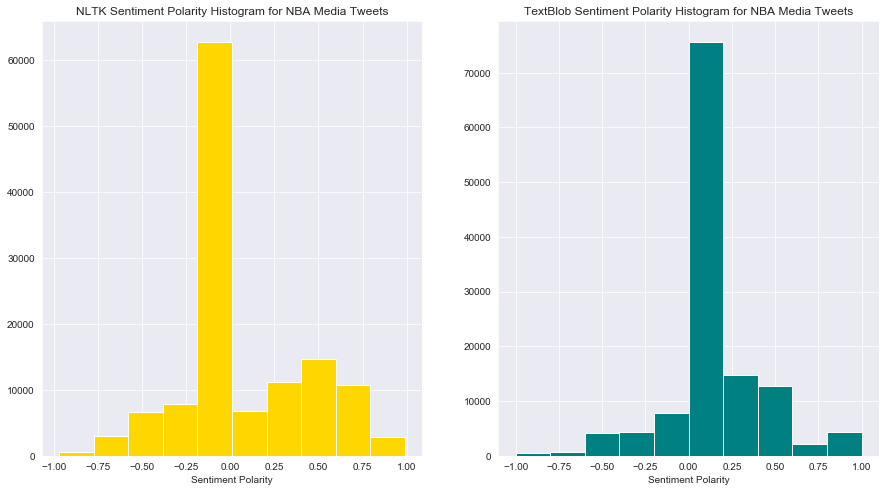

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].hist(x=tweet_df['nltk_sentiment'], color='gold')
axs[1].hist(x=tweet_df['textblob_sentiment'], color='teal')

axs[0].set_xlabel('Sentiment Polarity')
axs[0].set_title('NLTK Sentiment Polarity Histogram for NBA Media Tweets')
axs[1].set_xlabel('Sentiment Polarity')
axs[1].set_title('TextBlob Sentiment Polarity Histogram for NBA Media Tweets')